# Практическое задание

Титюшина Анна Олеговна, 128 гр.

### Задача Bike Sharing

Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодных условиях необходимо спрогнозировтаь спрос на прокат велосипедов.

В исходной псотановке задачи доступно 9 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

### Анализ и визуализация данных

In [1]:
from sklearn import cross_validation, ensemble, grid_search, linear_model, metrics, pipeline, preprocessing

import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from pandas import read_csv
data = read_csv('bike_sharing_train.csv')

In [12]:
print data.iloc[0:16]

               datetime  season  holiday  workingday  weather   temp   atemp  \
0   2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1   2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2   2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3   2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4   2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5   2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6   2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7   2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8   2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9   2011-01-01 09:00:00       1        0           0        1  13.12  17.425   
10  2011-01-01 10:00:00       1        0           0        1  15.58  19.695   
11  2011-01-01 11:00:00       1        0

3 . Проанализируйте описание данных:

***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***count*** - number of total rentals

weather, workingsday, season, temp

In [ ]:
windspeed, humidity

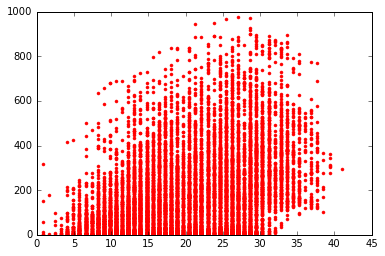

In [22]:
count = data["count"]
temp = data["temp"]
weather = data["weather"]
season = data["season"]
workingday = data["workingday"]
datetime = data["datetime"]
pylab.plot(temp, count, 'r.')

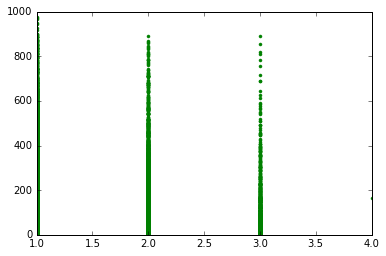

In [23]:
pylab.plot(weather, count, 'g.')

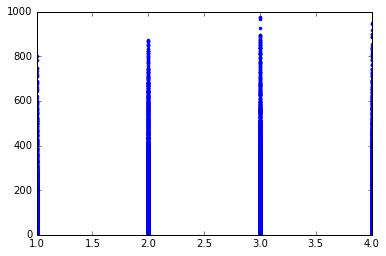

In [24]:
pylab.plot(season, count, 'b.')

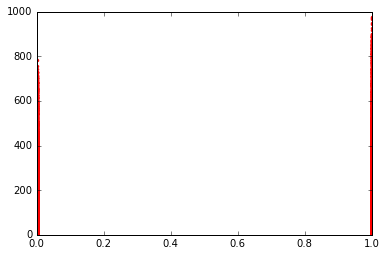

In [26]:
pylab.plot(workingday, count, 'r.')

Прокат пользуется большим спросом в рабочие дни, осенью, в погоду 1го типа, в температуру 20-30 градусов

In [44]:
data.corr()["count"]

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
Name: count, dtype: float64

In [38]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


In [45]:
data.mean()

season          2.506614
holiday         0.028569
workingday      0.680875
weather         1.418427
temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
count         191.574132
dtype: float64

In [46]:
data.std()

season          1.116174
holiday         0.166599
workingday      0.466159
weather         0.633839
temp            7.791590
atemp           8.474601
humidity       19.245033
windspeed       8.164537
count         181.144454
dtype: float64

### Линейные модели

In [82]:
X = data.ix[:, 1:-1]
Y = data.ix[:, -1]

In [84]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = X[7000:, :]
X_fit = X[:7000, :]
Y_test = Y.ix[7000:]
Y_fit = Y.ix[:7000-1]

In [85]:
modelSGD = linear_model.SGDRegressor()
modelSGD.fit(X_fit, Y_fit)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [86]:
modelLasso = linear_model.Lasso()
modelLasso.fit(X_fit, Y_fit)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
print "SGD", metrics.mean_absolute_error(Y_test, modelSGD.predict(X_test))
print "Lasso", metrics.mean_absolute_error(Y_test, modelLasso.predict(X_test))

SGD 155.50151189
Lasso 156.139794431


In [88]:
print modelSGD.coef_, 
modelLasso.coef_

[  9.58078647  -0.46092151  -1.42658573  -2.39023764  13.52310175
  38.33005682 -40.01267889   3.40736303]

array([  6.51541441,  -0.57617877,  -0.83127666,  -0.        ,
         0.        ,  52.84547031, -39.65352033,   3.44768043])

In [ ]:
# Пример:
# train_data, train_labels - DataFrame с обучающей выборкой и значения целевой функции на обучении
# test_data, test_labels - DataFrame с тестовой выборкой и значения целевой функции на тесте

# Создание индекса для бинарных признаков
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

# Создание индекса для вещественных признаков
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'season', 'weather']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

# Создание модели регресии
model = linear_model.SGDRegressor(random_state = 0)

# Объявление pipline -  цепочки преобразования данных, начиная от обработки данных в зависимости от их типа, и 
# заканчивая обучением модели. 

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler())            
                        ])),

        ])),
    ('model_fitting', model)
    ]
)

# С цепочкой можно работать как с одиночным преобразованием, в частности вызывать методы fit и predict 
estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

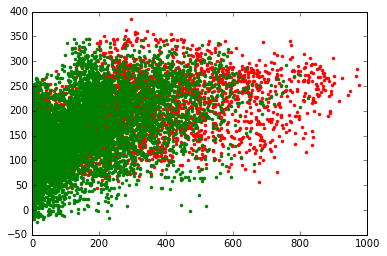

In [96]:
pylab.plot(Y_test, modelSGD.predict(X_test),'r.')
pylab.plot(Y_fit, modelSGD.predict(X_fit),'g.')
pylab.show()

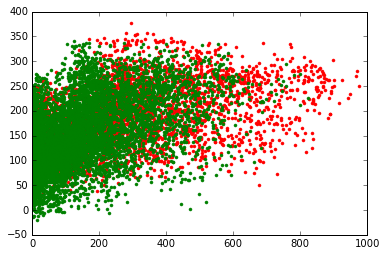

In [97]:
pylab.plot(Y_test, modelLasso.predict(X_test),'r.')
pylab.plot(Y_fit, modelLasso.predict(X_fit),'g.')
pylab.show()

### Случайный лес

In [89]:
randFor = ensemble.RandomForestRegressor()
randFor.fit(X_fit, Y_fit)
print "RandomForest", metrics.mean_absolute_error(Y_test, randFor.predict(X_test))

RandomForest 157.003098516


In [90]:
randFor.feature_importances_

array([ 0.07010291,  0.00433245,  0.04025109,  0.04927947,  0.19011972,
        0.16247925,  0.29274559,  0.19068952])

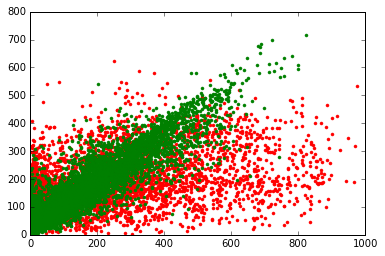

In [98]:
pylab.plot(Y_test, randFor.predict(X_test),'r.')
pylab.plot(Y_fit, randFor.predict(X_fit),'g.')
pylab.show()

### Опциональная часть

Попробуйте улучшить результат, полученный на предыдущих шагах. В этом разделе можно и нужно пользоваться любыми изученными алгоритмами, инструментами и всем, чем вам захочется.

### Заключение

В этом разделе Вы можете написать, какие выводы Вы сделали в процессе работы над заданием, понравилось ли оно Вам, а также всё, что Вы о задании думаете =)